3.141592653589793


<IPython.core.display.Javascript object>


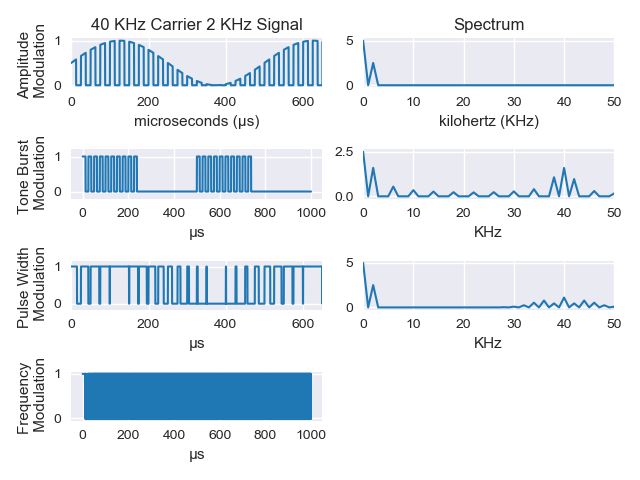

In [253]:
#prerequisites
%matplotlib notebook
import matplotlib as mpl
import pylab as pl
import numpy as np
import seaborn as sns
from scipy import signal
#seaborn
sns.set_context("notebook", rc={"lines.linewidth": 1.5})
sns.set_style("darkgrid")
#variables
s = pl.arange(0, 1000, 0.001)
hirez = pl.arange(0, 1000000, 1)
khz = 2*np.pi/1000
print(np.pi)
def squarewave(f, duty = 0.5):
    tallwave = signal.square(s*f, duty)+1
    wave = tallwave/2
    return wave
def pwm(f):
    sig = np.sin(f*s)
    wave = squarewave(40*khz, (sig + 1)/2)
    return wave
def fmod(f, w):
    sig = w*np.sin(f*hirez)
    wave = squarewave((40+sig)*khz)
    return wave
#plotting
pl.figure()
pl.clf()
    #amplitude modulation
pl.subplot(4, 2, 1)
pl.title("40 KHz Carrier 2 KHz Signal")
pl.ylabel("Amplitude \n Modulation")
pl.plot(s, (np.sin(2*khz*s)+1)/2*squarewave(40*khz))
pl.xlim([0, 650])
pl.xlabel("microseconds (µs)")
    #amplitude modulation spectrum
pl.subplot(4, 2, 2)
pl.title("Spectrum")
pl.plot(hirez, abs(pl.fft(np.sin(2*khz*s)+1)/2*squarewave(40*khz))/100000)
pl.xlim([0, 50])
pl.xlabel("kilohertz (KHz)")
    #tone burst modulation
pl.subplot(4, 2, 3)
pl.ylabel("Tone Burst \n Modulation")
#pl.title("40KHz * 2KHz")
pl.plot(s, squarewave(2*khz)*squarewave(40*khz))
pl.ylim([-0.2, 1.2])
pl.xlabel("µs")
    #tone burst spectrum
pl.subplot(4, 2, 4)
#pl.title("Spectrum")
pl.plot(hirez, abs(pl.fft(squarewave(2*khz)*squarewave(40*khz)))/100000)
pl.xlim([0, 50])
pl.xlabel("KHz")
    #pulse width modulation
pl.subplot(4, 2, 5)
pl.ylabel("Pulse Width \n Modulation")
#pl.title("40KHz Carrier, 2KHz DCM")
pl.plot(s, pwm(2*khz))
pl.xlim([0, 650])
pl.ylim([-0.16, 1.16])
pl.xlabel("µs")
    #pulse width modulation spectrum
pl.subplot(4, 2, 6)
#pl.title("Spectrum")
pl.plot(hirez, abs(pl.fft(pwm(2*khz)))/100000)
pl.xlim([0, 50])
pl.xlabel("KHz")
pl.subplot(4, 2, 7)
pl.ylabel("Frequency \n Modulation")
pl.plot(s, fmod(2*khz, 5))
#pl.xlim([0, 650])
pl.xlabel("µs")
#formatting
pl.tight_layout()